In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sympy import *
from sympy.abc import x
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

# Chapter 03, Analytic Geometry
## 3.1 Norms
### Example 3.1 (Manhattan Norm), Example 3.2 (Euclidean Norm)
#### Figure 3.3
$$
||x||_1 := \Sigma_{i=1}^n|x_i| = 1, \\
|x_2| + |x_1| = 1, x_2 = 1-|x_1|\\
||x||_2 := \sqrt{\Sigma_{i=1}^{n}x^2_i} = \sqrt{x^Tx} = 1, \\
\sqrt{x_1^2 + x_2^2} = 1, x_2 = \sqrt{1-x_1^2}
$$
Where we state "$= 1$", to produce a unit shape. 

1. For the $l_1$ norm, we are selecting $x_0$ and $x_1$ such that the sum of their absolute values is 1.
2. For the $l_2$ norm, we are selecting $x_0$ and $x_1$ such that the square root of the sum of their squared values is 1.

In [3]:
# L1 and L2 Norm.
# Building L1 and L2, (x,y) coordinates for 4 quadrants, where y in the first is of the form 1-x, and sqrt(1-x**2).
xRight = np.linspace(0,1,50)
xLeft = np.linspace(-1,0,50)
l1normData = np.hstack([np.vstack(np.vstack([xRight,xLeft,xLeft,xRight]).ravel()),
                       np.vstack(np.vstack([1-xRight, xLeft+1, -xLeft-1, xRight-1]).ravel())])
l2normData = np.hstack([np.vstack(np.vstack([xRight,xLeft,xLeft,xRight]).ravel()),
                       np.vstack(np.vstack([np.sqrt(1-xRight**2), np.sqrt(-xLeft**2+1), -np.sqrt(-xLeft**2+1), -np.sqrt(1-xRight**2)]).ravel())])
# L1 and L2 Norm.

Matrix(l1normData[:5]-l2normData[:5]) # The difference between the first 5 values of the L1 and L2 norm.

Matrix([
[0.0,                 0.0],
[0.0, -0.0201998950135421],
[0.0, -0.0399829930525427],
[0.0, -0.0593485110724477],
[0.0, -0.0782951385367167]])

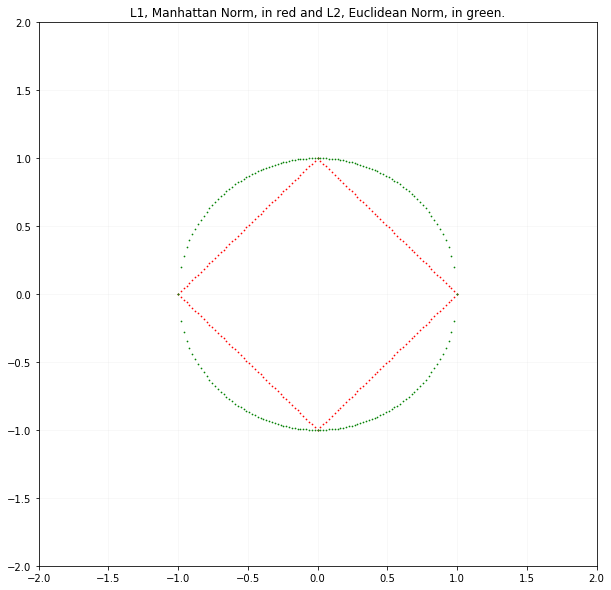

In [4]:
# Data and figure initialization.
plt.axis([-scale/5,scale/5,-scale/5,scale/5])
plt.grid(alpha=.1)
plt.title("L1, Manhattan Norm, in red and L2, Euclidean Norm, in green.")
# Data and figure initialization.

plt.scatter(l1normData[:,0],l1normData[:,1],s=.5,color="r")
plt.scatter(l2normData[:,0],l2normData[:,1],s=.5,color="g");

## 3.2 Inner Products
### Example 3.3 (Inner Product That Is Not the Dot Product)

In [5]:
x = np.vstack([1,2])
y = np.vstack([3,4])
Matrix(x)
Matrix(y)

Matrix([
[1],
[2]])

Matrix([
[3],
[4]])

In [6]:
Matrix(np.dot(x,y.T))
Matrix(x[0]*y[0] - (x[0]*y[1]+x[1]*y[0])+2*x[1]*y[1] )
# This can be called an inner product as it is symmetric and a bilinear mapping, that is it 
# does still combine elements from 2 symmetric spaces and outputs 1 element,
# and it turns out, this has a different output from the dot product.

Matrix([
[3, 4],
[6, 8]])

Matrix([[9]])

### Example 3.4 (Symmetric, Positive Definite Matrices)

In [7]:
A1 = np.vstack([[9,6],[6,5]])
A2 = np.vstack([[9,6],[6,3]])
Matrix(A1)
Matrix(A2)

Matrix([
[9, 6],
[6, 5]])

Matrix([
[9, 6],
[6, 3]])

In [8]:
x = symbols('x')
y = symbols('y')
A1 = Matrix(A1)

In [9]:
A1expr = simplify(Matrix([x,y]).T*A1*Matrix([x,y]))[0]
A1expr
f = lambdify([x,y],A1expr)

9*x**2 + 12*x*y + 5*y**2

In [10]:
Matrix(np.array([f(-1,-1),f(-1,1),f(1,-1),f(1,1)]) > 0) # Checking for positive definiteness.

Matrix([
[True],
[True],
[True],
[True]])

The above is positive definite because it is symmetric and the expression output is always greater than 0.

In [11]:
A2 = Matrix(A2)
A2

Matrix([
[9, 6],
[6, 3]])

In [12]:
A2expr = simplify(Matrix([x,y]).T*A2*Matrix([x,y]))[0]
A2expr
g = lambdify([x,y],A2expr)

9*x**2 + 12*x*y + 3*y**2

In [13]:
Matrix(np.array([g(-1,-1),g(-1,1),g(1,-1),g(1,1)]) > 0)

Matrix([
[ True],
[False],
[False],
[ True]])

The above expression is symmetric, but not positive definite because some outputs are less than 0.

In [14]:
Matrix(np.array([g(-1,-1),g(-1,1),g(1,-1),g(1,1)]) >= 0)

Matrix([
[True],
[True],
[True],
[True]])

We see that some values are equal to 0 though, so we say only $\geq$ holds, and thus is symmetric, positive *semidefinite*. 

## 3.3 Lengths and Distances 
Norms can be used to find the length of a vector, to find *some* norms, e.g. Manhattan Norm does not require an inner product. A norm can be found by taking the square root of the inner product. 
### Example 3.5 (Lengths of Vectors Using Inner Products)

In [15]:
x0 = np.vstack([1,1])
Matrix(x0)

Matrix([
[1],
[1]])

In [16]:
np.sqrt(np.dot(x0.T,x0))

array([[1.41421356]])

In [17]:
# Using the inner product noted above, we get a "shorter" length.
x0[0]*x0[0] - (x0[0]*x0[1]+x0[1]*x0[0])+2*x0[1]*x0[1] 

array([1])

## 3.4 Angles and Orthogonality
#### Figure 3.4

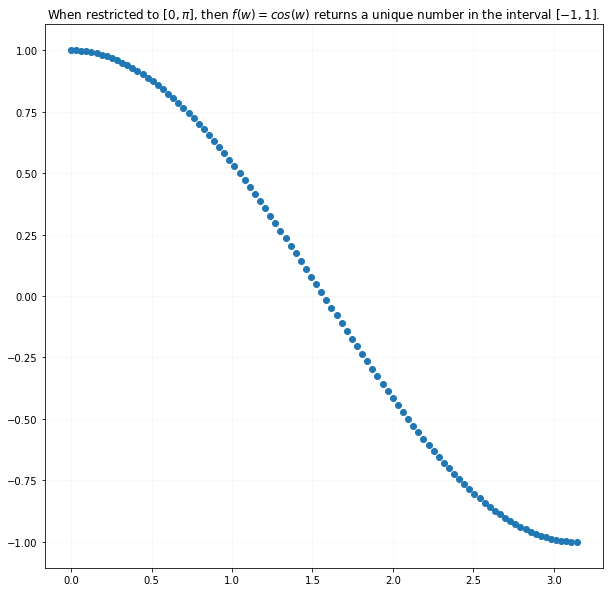

In [18]:
plt.scatter(np.linspace(0,np.pi,100),np.cos(np.linspace(0,np.pi,100)))
plt.grid(alpha=.1)
plt.title(r"When restricted to $[0,\pi]$, then $f(w) = cos(w)$ returns a unique number in the interval $[-1,1]$.");

### Example 3.6 (Angle between Vectors)

$$
cos\omega = \frac{\langle x,y\rangle}{\sqrt{\langle x,x\rangle\langle y,y\rangle}} = \frac{x^Ty}{\sqrt{x^Txy^Ty}}
$$

In [19]:
x = np.vstack([1,1])
y = np.vstack([1,2])
Matrix(x)
Matrix(y)

Matrix([
[1],
[1]])

Matrix([
[1],
[2]])

In [20]:
cosAngle = lambda x, y: (np.dot(x.T,y)/np.sqrt(np.dot(np.dot(x.T,x),np.dot(y.T,y))))[0][0]
angle = lambda cos: np.arccos(cos)*(180/np.pi)
angle(cosAngle(x,y))

18.434948822922017

#### Figure 3.5
*The angle $\omega$ between two vectors $x,y$ is computed using the inner product.*

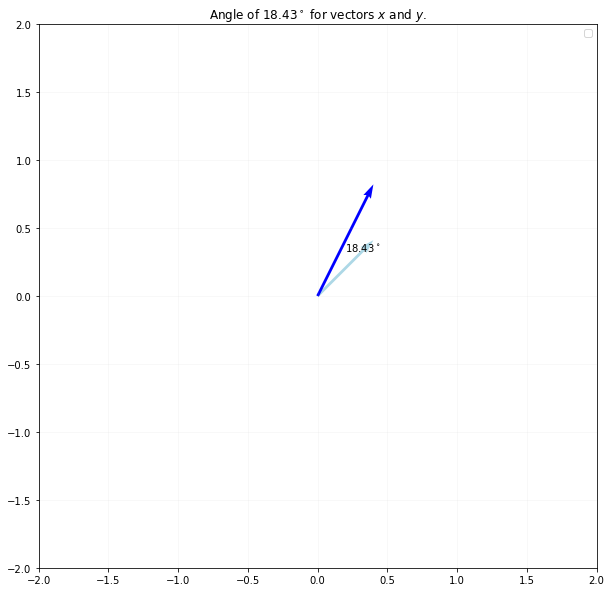

In [21]:
# Figure setup.
plt.grid(alpha=.1)
plt.legend(["x","y"])
plt.axis([-scale/5,scale/5,-scale/5,scale/5])
plt.title(r"Angle of %1.2f$^\circ$ for vectors $x$ and $y$." %round(angle(cosAngle(x,y)),2))
# Figure setup.

plt.quiver(*origin2D, *x,scale=scale,color="lightblue", width=.005)
plt.quiver(*origin2D, *y,scale=scale,color="blue", width=.005)
plt.annotate(str(round(angle(cosAngle(x,y)),2))+r"$^\circ$",xy=(scale/50,scale/30));

In [22]:
x = np.vstack([1,1])
y = np.vstack([-1,1])
Matrix(x)
Matrix(y)

Matrix([
[1],
[1]])

Matrix([
[-1],
[ 1]])

In [23]:
angle(cosAngle(x,y))

90.0

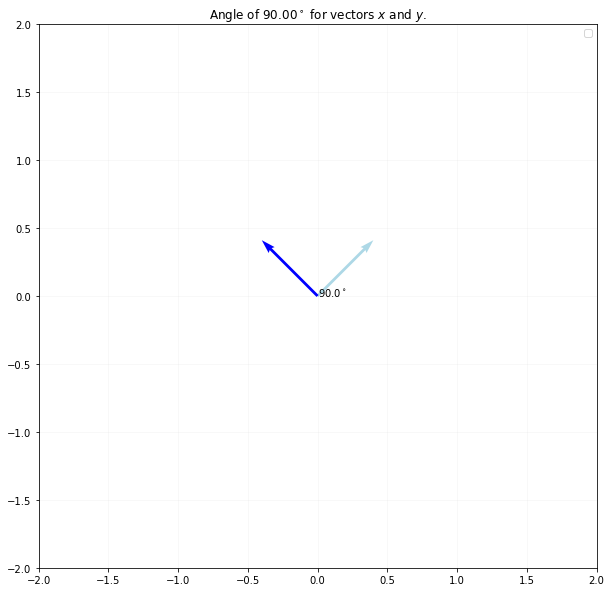

In [24]:
# Figure setup.
plt.grid(alpha=.1)
plt.legend(["x","y"])
plt.axis([-scale/5,scale/5,-scale/5,scale/5])
plt.title(r"Angle of %1.2f$^\circ$ for vectors $x$ and $y$." %round(angle(cosAngle(x,y)),2))
# Figure setup.

plt.quiver(*origin2D, *x,scale=scale,color="lightblue", width=.005)
plt.quiver(*origin2D, *y,scale=scale,color="blue", width=.005)
plt.annotate(str(round(angle(cosAngle(x,y)),2))+r"$^\circ$",xy=origin2D);

In [25]:
x = np.vstack([1,1])
y = np.vstack([-1,1])
inner = np.vstack([[2,0],[0,1]])

In [26]:
omega = (x.T@inner@y)/npl.norm(x.T@inner@x)
omega
angle(omega)

array([[-0.33333333]])

array([[109.47122063]])

By changing how inner is induced, such as with the matrix $\begin{bmatrix}2&0\\0&1\end{bmatrix}$, we find the vectors are no longer orthogonal, despite their being orthogonal with respect to another inner product.

## 3.5 Orthonormal Basis
We can use Gaussian elimination to find a basis for a vector space. If we are given a set of non-orthogonal, unnormalized basis vectors, we can concatenate them to construct an audmented matrix, and apply Gaussian elimination to it, to find an orthonormal basis. This process is called the *Gram-Schmidt* process. 

### Example 3.8 (Orthonormal Basis)

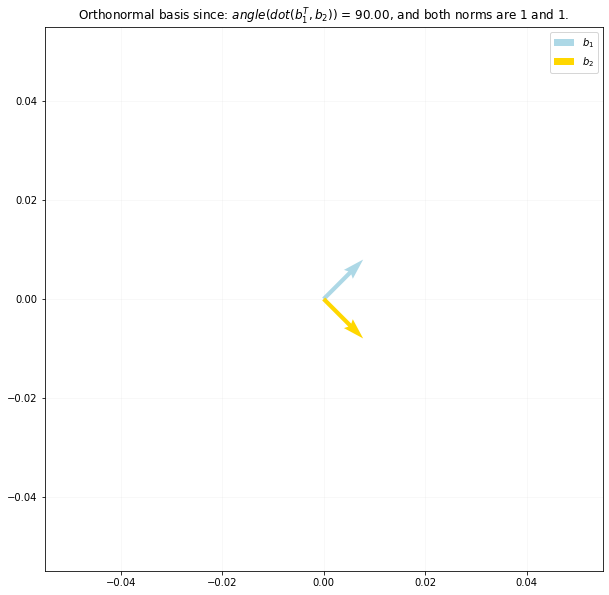

In [27]:
# Data and figure setup.
plt.grid(alpha=.1)
b1 = np.vstack([1,1])*(1/np.sqrt(2))
b2 = np.vstack([1,-1])*(1/np.sqrt(2))
plt.title(r"Orthonormal basis since: $angle(dot(b_1^T,b_2))$ = %1.2f," %angle(np.dot(b1.T,b2)) + " and both norms are %i " %round(npl.norm(b1)) + "and %i." %round(npl.norm(b2)))
# Data and figure setup.

plt.quiver(*origin2D,*b1,scale=scale, color = "lightblue")
plt.quiver(*origin2D,*b2,scale=scale, color = "gold")
plt.legend([r"$b_1$",r"$b_2$"]);

## 3.6 Orthogonal Complement
#### Figure 3.7
Any plane in $\mathbb{R}^3$ can be described by some vector orthogonal to it, this vector is said to span it's orthogonal complement, and is known as the normal vector of a plane.

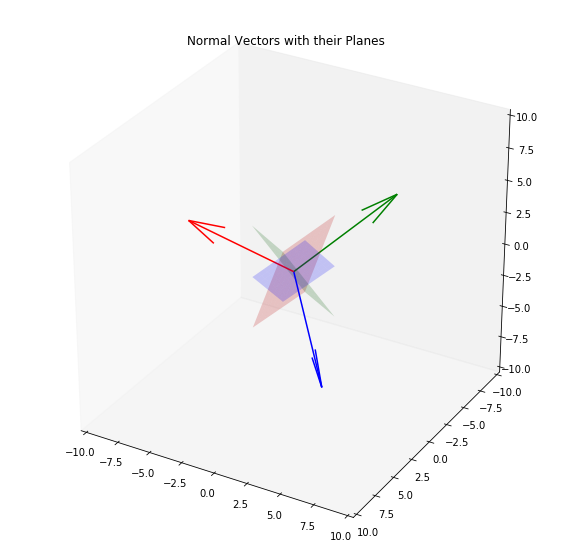

In [28]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection = '3d')
scale3D = 10
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
point  = origin3D.T[0]
ax.grid(b=None)
# Figure setup.

colors = ["r","g","b"]
normalVecs = np.vstack([[-1,1,1],[1,-1,1],[1,1,-1]])
for c,i in enumerate(normalVecs): # Using index of vectors to iterate colors.
    d = np.dot(-point,i)
    xx, yy = np.meshgrid(np.linspace(-scale3D/5,scale3D/5,10), np.linspace(-scale3D/5,scale3D/5,10))
    z = (d-i[0] * xx - i[1] * yy) /i[2] #ax+by+cz = d âˆ´ z = (d-ax-by)/c
    ax.plot_surface(xx, yy, z, alpha=0.2,color = colors[c])
    ax.quiver(*point,*i, length=scale3D/2,color=colors[c])
    
ax.set_title("Normal Vectors with their Planes");

## 3.7 Inner Product of Functions
An inner product of two functions u and v mapping from $\mathbb{R}$ to $\mathbb{R}$, can be defined as the following.
$$
\langle u,v \rangle := \int_a^b u(x)v(x)dx
$$
### Example 3.9 (Inner Product of Functions)
$$
u = sin(x)\\
v = cos(x) \\
f(x) = u(x)v(x)
$$

#### Figure 3.8

In [29]:
x = np.linspace(-np.pi,np.pi,100)
y = lambda x: np.sin(x)*np.cos(x)

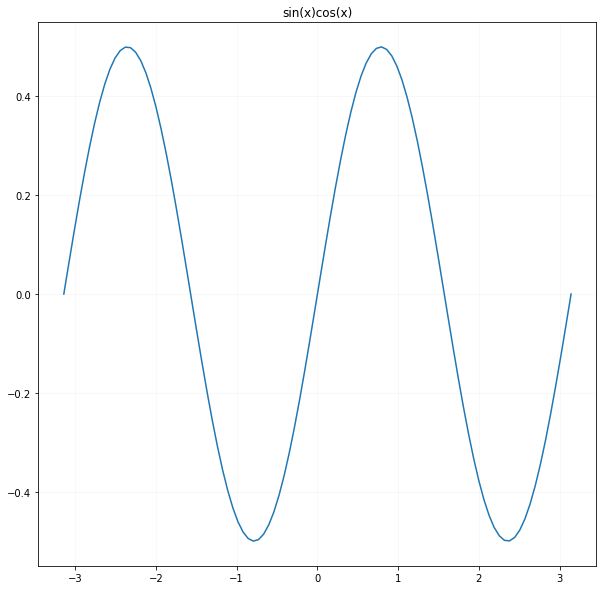

In [30]:
plt.plot(x,y(x))
plt.grid(alpha=.1)
plt.title("sin(x)cos(x)");

This function is odd, f(-x) = -f(x), so the integral from -_ to _ will evaluate to 0, thus sine and cosine are orthogonal.

In [31]:
y(-2), -y(2)

(0.37840124765396416, 0.37840124765396416)

An integration of the function sin(x)cos(x) with respect to x, over -pi and pi, as stated above, evaluates to 0.

In [32]:
symbX = Symbol("x")
integrate(sin(symbX)*cos(symbX),(symbX,-pi,pi))

0

In [33]:
round(sum(np.sin(x)*np.cos(x)))

0.0

It also holds that the collection of functions $\{1,cos(x)...cos(n\times x)\}$ is orthogonal if we integrate from $-\pi$ to $\pi$, i.e. any pair are orthogonal.

In [34]:
integrate(cos(symbX)*cos(3*symbX),(symbX,-pi,pi))

0

## 3.8 Orthogonal Projections
*This section begins with an implementation, and procedes with an explanation and reimplementation.*
#### Figure 3.9

In [35]:
# Initializing data and using least squares regression as fit line.
xs = np.vstack([-3.2,-2.2,-2,-1.7,-1.7,-1.5,-1.3,-.4,-.3,0,.5,.6,.8,1,1.1,1.2,1.3,1.7,2.3,3.2])
ys = np.vstack(np.random.normal(0,.8,len(xs)))
points = np.hstack([xs,ys])
lsq = npl.lstsq(points,np.random.randn(20))[0] 
# Initializing data and using least squares regression as fit line.

posPts = [p for p in points if p[0]>=0] # Splitting into positive and negative to keep a 0,0 origin.
negPts = [p for p in points if p[0]<0]
maxNeg = np.hstack([xs[0],[xs*(lsq[0]/lsq[1])][0][0]]) # -Line for data to project onto.
maxPos = np.hstack([xs[::-1][0],[xs*(lsq[0]/lsq[1])][0][::-1][0]]) # +Line for data to project onto.

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


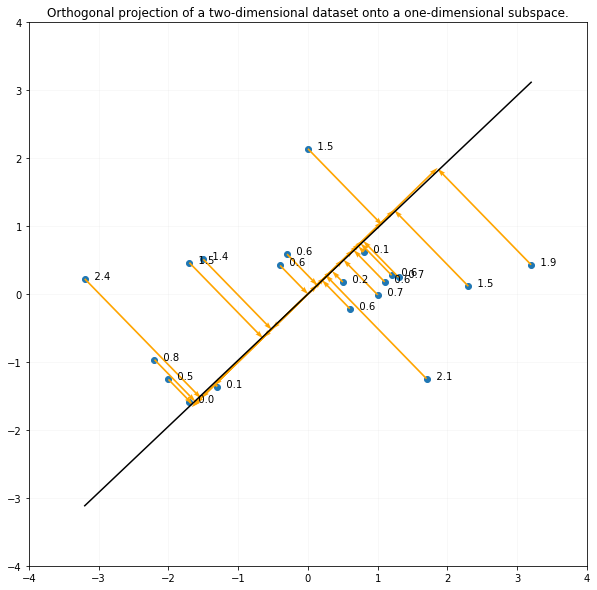

In [36]:
# Figure setup.
plt.axis([-4,4,-4,4])
plt.plot(xs,xs*(lsq[0]/lsq[1]),c="k")
plt.scatter(points[:,0],points[:,1])
plt.grid(alpha=.1)
# Figure setup.

# Iteratively finding each projection and plotting it.
for i in negPts:
    newQ = (np.dot(i,maxNeg)/npl.norm(maxNeg)**2)*maxNeg # Projection step: p = v2 * (dot(v1,v2)/norm(v2)**2).
    plt.quiver(*origin2D,*newQ,scale=8,width=.003,color="orange")  # Projection vector.
    currV = newQ-i 
    plt.quiver(*i,*currV,scale=8,width=.003,color="orange")
    plt.annotate("   " + str(round(npl.norm(currV),1)),i)    
for i in posPts:
    newQ = (np.dot(i,maxPos)/npl.norm(maxPos)**2)*maxPos # Projection step: p = v2 * (dot(v1,v2)/norm(v2)**2).
    plt.quiver(*origin2D,*newQ,scale=8,width=.003,color="orange")  # Projection vector.
    currV = newQ-i 
    plt.quiver(*i,*currV,scale=8,width=.003,color="orange")
    plt.annotate("   " + str(round(npl.norm(currV),1)),i)
# Iteratively finding each projection and plotting it.
    
plt.title("Orthogonal projection of a two-dimensional dataset onto a one-dimensional subspace.");

#### Figure 3.10
*Examples of projections onto one-dimensional subspaces.*

In [37]:
v1 = np.vstack([1,2])
v2 = np.vstack([2,1])
projec = lambda v1,v2: (np.dot(v2.T,v1.T)/npl.norm(v1.T)**2) * v2 # v2 * (dot(v1,v2)/norm(v2)**2)
v3 = projec(v1.ravel(),v2.ravel()) # Projection step.
v4 = v3.ravel() - v1.ravel()
Matrix(v1)
Matrix(v2)
Matrix(v3)
Matrix(v4)

Matrix([
[1],
[2]])

Matrix([
[2],
[1]])

Matrix([
[1.6],
[0.8]])

Matrix([
[ 0.6],
[-1.2]])

In [38]:
plt.rcParams[ "figure.figsize" ] = (7,7)

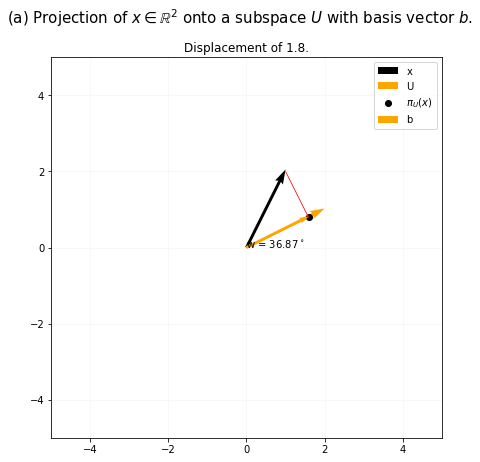

In [39]:
# Figure setup.
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.suptitle(r"(a) Projection of $x \in \mathbb{R}^2$ onto a subspace $U$ with basis vector $b$.",size=15)
plt.title("Displacement of %1.1f." %npl.norm(v3))
plt.grid(alpha=.1)
# Figure setup.

# Plotting projection.
plt.quiver(*origin2D, *v1, scale=scale, color = "k")
plt.quiver(*origin2D, *v2, scale=scale, color = "orange")
plt.scatter(*v3,color="k")
plt.quiver(*origin2D,*v3,scale=scale, width = .005,color="orange")
plt.quiver(*v1,*v4,scale=scale,width=.002,color="red")
# Plotting projection.

plt.annotate("w = " + str(round(angle(cosAngle(v1,v2)),2))+r"$^\circ$",xy=origin2D)
plt.legend(["x","U",r"$\pi_U(x)$","b"]);

1. The projection $\pi_U(x)$ is closest to $x$, where "closest" implies that the distance $||x-\pi_U(x)||$ is minimal. It follows that the (red) segment is orthogonal to $U$, and therefore the basis vector $b$ of $U$. The orthogonality condition yields $\langle \pi_U(x) - x, b\rangle = 0$, since angles between vectors are defined via the inner product.

```python
'''
v3 = pi_u 
v1 = x 
v2 = b
'''
```

In [40]:
round(np.inner(v3 - v1.T,v2.T)[0][0],5) # Checking orthogonality condition

-0.0

2. The projection $\pi_U(x)$ of $x$ onto $U$ must be an lement of $U$ and, therefore, a multiple of the basis vector $b$ that spansU. Hence, $\pi_U(x) = \lambda b$, for some $\lambda \in \mathbb{R}$.

In [41]:
v1 = np.vstack(np.array([1,0]))
v2 = np.vstack(l2normData[34:35][0])
v3 = projec(v2.ravel(),v1.ravel()) # Projection step.
v4 = v3.ravel()-v2.ravel()
Matrix(v1)
Matrix(v2)
Matrix(v3)
Matrix(v4)

Matrix([
[1],
[0]])

Matrix([
[0.693877551020408],
[0.720093010790912]])

Matrix([
[0.693877551020408],
[              0.0]])

Matrix([
[               0.0],
[-0.720093010790912]])

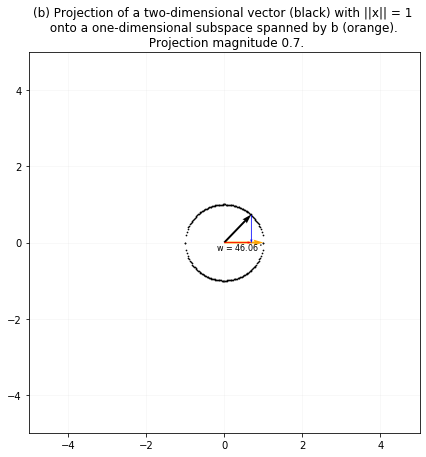

In [42]:
# Figure setup.
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.grid(alpha=.1)
plt.scatter(l2normData[:,0],l2normData[:,1],s=.5,color="k") # Circle data from prior figure on the L2 norm.
plt.title("(b) Projection of a two-dimensional vector (black) with ||x|| = 1 \n onto a one-dimensional subspace spanned by b (orange)." + " \n Projection magnitude %1.1f." %npl.norm(v3));
# Figure setup.

# Projection plotting.
plt.quiver(*origin2D, *v1,scale=scale, color="orange", width=.005)
plt.quiver(*origin2D, *v2,scale=scale, color="k", width=.005)
plt.annotate("w = " + str(round(angle(cosAngle(v1,v2)),2))+r"$^\circ$",xy=origin2D-.2, size = 8)
plt.quiver(*origin2D,*v3,scale=scale,width=.002,color="red")
plt.quiver(*v2,*v4,scale=scale,width=.002,color="blue");
# Projection plotting.

Three steps to determine a projection between any vector x and some basis vector, b, for a subspace, U.

1. Find the scalar, $\lambda$ for b. Given that some projection, p, exists, the inner product between x-p and b, will equal 0. <br>
    a. We know that the projection, p, can also be written as a scalar operation of our basis vector, b, so we say $\langle x-\lambda b,b \rangle= 0$. <br>
    b. We can then isolate the scalar, $\lambda$, by seeing that the above is equal to the inner product of x and b minus $\lambda \langle b,b \rangle = 0$ <br>
    c. $\lambda = \frac{\langle x,b \rangle}{\langle b,b \rangle}$ which can also be written as the inner product between b and x divided by the squared norm of b, $\frac{\langle b,x \rangle}{||b||^2}$. 
2. Find the point on U that the projection, p, will create. Seeing as $p = \lambda b$, we take (c) from above to find $p = \frac{\langle x,b \rangle}{\langle b,b \rangle} b$.
3. Find a projection matrix $P_p$. We know a projection is simply a linear mapping, so we should be able to find a matrix, $P$, that takes any vector, $x$, and maps it, or creates a new projected vector, $p$, to our subspace or line, such that $p = P_p x$, and $P_p = \frac{p}{x}$. <br>
    a. Seeing as $p = \frac{\langle x,b \rangle}{\langle b,b \rangle} b$, from 2. above, $P_p  = \frac{1}{x}\frac{\langle x,b \rangle}{\langle b,b \rangle} b = \frac{bb^T}{\langle b,b \rangle}$
    
**Applying these steps to Figure 3.9.**

In [43]:
data = np.vstack([negPts,posPts])
pB = np.vstack(maxPos)#basis vector
nB = np.vstack(maxNeg)
Matrix(pB)
Matrix(nB)
sampleX = np.vstack(data[0])
Matrix(sampleX)

Matrix([
[             3.2],
[3.11596518977999]])

Matrix([
[             -3.2],
[-3.11596518977999]])

Matrix([
[             -3.2],
[0.222895607313388]])

**Step 1.** Find lambda. Recall lambda is the scalar applied to B that represents the coordinates of the projection.

In [44]:
sampleLam = np.dot(nB.T,sampleX)/npl.norm(nB)**2 # b^T x / ||b||^2; recall inner(x,b) = dot(b^T,x)
sampleLam

array([[0.47848768]])

**Step 2.** Find projected point using lambda. 

In [45]:
sampleP = nB*sampleLam
Matrix(sampleP)

Matrix([
[-1.53116056464251],
[-1.49095094355936]])

**Step 3.** Find projection matrix, P. For any data point, x, the dot product between P and x will yield the new data point projected on the line. 

In [46]:
pMatrix = np.dot(nB,nB.T)/npl.norm(nB)**2 #bb^T/||b||^2
Matrix(pMatrix)

Matrix([
[0.513302786496735, 0.499823004544031],
[0.499823004544031, 0.486697213503265]])

In [47]:
Matrix(sampleP)
Matrix(np.dot(pMatrix,sampleX))

Matrix([
[-1.53116056464251],
[-1.49095094355936]])

Matrix([
[-1.53116056464251],
[-1.49095094355935]])

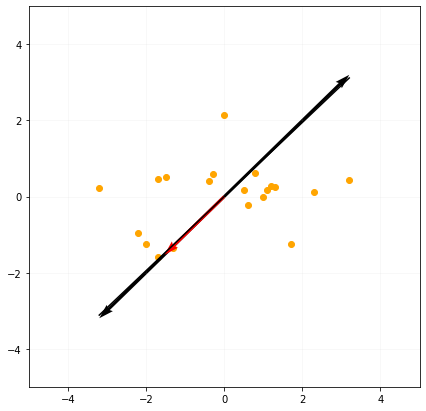

In [48]:
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.grid(alpha=.1)
plt.scatter(data[:,0],data[:,1],color="orange")
plt.plot(xs,xs*(lsq[0]/lsq[1]),c="k")
plt.quiver(*origin2D,*maxNeg,scale=scale)
plt.quiver(*origin2D,*maxPos,scale=scale)
plt.quiver(*origin2D,*sampleP,scale=scale,color="r");

### Example 3.10 (Projection onto a Line)

In [49]:
b = np.vstack([1,2,2])
Matrix(b)

Matrix([
[1],
[2],
[2]])

In [50]:
# Invoke step 3 from above.
Matrix(np.dot(b,b.T))
npl.norm(b)**2
P = np.dot(b,b.T)/npl.norm(b)**2 #bb^T/||b||^2
Matrix(P)

Matrix([
[1, 2, 2],
[2, 4, 4],
[2, 4, 4]])

9.0

Matrix([
[0.111111111111111, 0.222222222222222, 0.222222222222222],
[0.222222222222222, 0.444444444444444, 0.444444444444444],
[0.222222222222222, 0.444444444444444, 0.444444444444444]])

In [51]:
x = np.vstack([1,1,1])
Matrix(np.dot(P,x))

Matrix([
[0.555555555555556],
[ 1.11111111111111],
[ 1.11111111111111]])

In [52]:
plt.rcParams[ "figure.figsize" ] = (10,10)

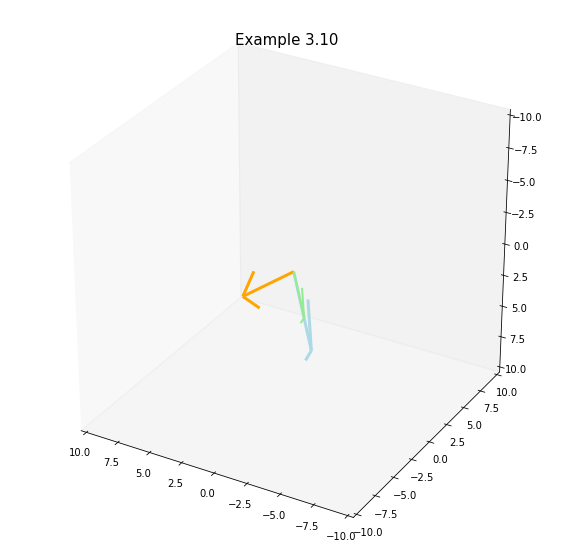

In [53]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.grid(b=None)
scale3D = 10
ax.set_xlim3d(scale3D,-scale3D) # Inverted graph orientation for figure clarity.
ax.set_ylim3d(-scale3D,scale3D)
ax.set_zlim3d(scale3D,-scale3D)
point  = origin3D.T[0]
ax.quiver(*origin3D, *b,length=scale3D, color = "lightblue",lw=3)  
ax.quiver(*origin3D, *x,length=scale3D, color = "orange",lw=3)  
ax.quiver(*origin3D, *np.dot(P,x), length=scale3D, color="lightgreen", lw=2)
ax.set_title("Example 3.10", size=15);

**Steps 1-3 revisited for projection onto a general subspace.**

1. Find lambdas of the projection with respect to the basis of the subspace. <br>
    a. $\lambda = (B^TB)^{-1}B^Tx$. Where $\lambda$ is the set of all lambdas, and $B$ is the set of all bases. 
2. Find projection by multiplying lambda by B.
3. Find the general projection matrix by dividing the projection in 2 by x. 

### Example 3.11 (Projection onto a Two-dimensional Subspace)

In [54]:
basis1 = np.vstack([1,1,1])
basis2 = np.vstack([0,1,2])
B = np.hstack([basis1,basis2])
x = np.vstack([6,0,0])
proj = np.vstack([5,2,-1])
projDisplacement = x - proj
Matrix(B)
Matrix(x)
Matrix(proj)
Matrix(projDisplacement)

Matrix([
[1, 0],
[1, 1],
[1, 2]])

Matrix([
[6],
[0],
[0]])

Matrix([
[ 5],
[ 2],
[-1]])

Matrix([
[ 1],
[-2],
[ 1]])

The projection was found using the steps noted above. 
1. $\lambda = (B^TB)^{-1}B^Tx$.
2. $\pi = B\lambda$
3. $\mathbb{P} = \frac{B}{x}\lambda$

In [55]:
# 1. 
lam = npl.inv(B.T@B)@B.T@x
# 2. 
pi = B@lam
# 3. 
P = B@npl.inv(B.T@B)@B.T 
# Note that B/x is handled by removing the x from the equation used for lam.
Matrix(lam)
Matrix(pi)
Matrix(P)
Matrix(P@x)

Matrix([
[ 5.0],
[-3.0]])

Matrix([
[ 5.0],
[ 2.0],
[-1.0]])

Matrix([
[ 0.833333333333333, 0.333333333333333, -0.166666666666667],
[ 0.333333333333333, 0.333333333333333,  0.333333333333333],
[-0.166666666666667, 0.333333333333333,  0.833333333333333]])

Matrix([
[ 5.0],
[ 2.0],
[-1.0]])

In [56]:
xTest1 = np.vstack([1,-.5,3])
xTest2 = np.vstack([-2,1,0])
pTest1 = P@xTest1
pTest2 = P@xTest2
displ1 = xTest1 - pTest1
displ2 = xTest2 - pTest2

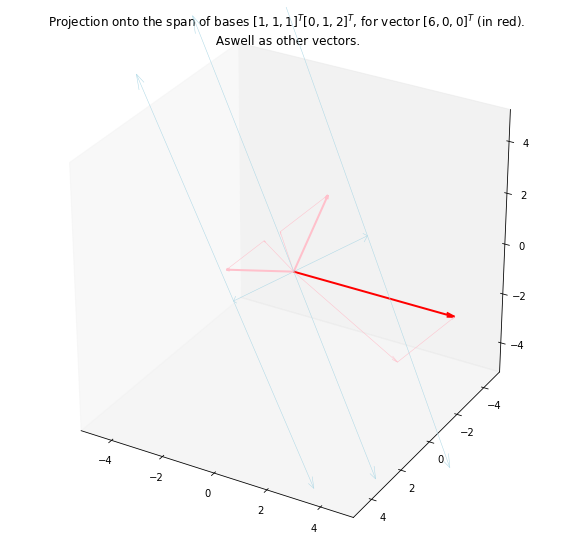

In [57]:
# 3D Figure Formatting.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.grid(b=None)
scale3D = 5
ax.set_xlim3d(-scale3D/1,scale3D/1)
ax.set_ylim3d(scale3D/1,-scale3D/1)
ax.set_zlim3d(-scale3D/1,scale3D/1)
ax.set_title(r"Projection onto the span of bases $[1 , 1 , 1]^T [0 , 1 , 2]^T$, for vector $[6,0,0]^T$ (in red)." + "\n Aswell as other vectors.")
# 3D Figure Formatting.

# Span visualization.
quiveropts = dict(color='lightblue', linewidths = .5,arrow_length_ratio = .05, pivot='tail')
spanScalar = 6
ax.quiver(*origin3D,*B[:,0]*spanScalar,**quiveropts)
ax.quiver(*origin3D,*B[:,1]*spanScalar,**quiveropts)
ax.quiver(*origin3D,*-B[:,0]*spanScalar,**quiveropts)
ax.quiver(*origin3D,*-B[:,1]*spanScalar,**quiveropts)
ax.quiver(*B[:,0]*spanScalar, *((B[:,0]+B[:,1])-B[:,0])*spanScalar,**quiveropts)
ax.quiver(*B[:,0]*spanScalar, *((B[:,0]+B[:,1])-B[:,0])*-spanScalar,**quiveropts)
ax.quiver(*-B[:,0]*spanScalar, *(-((B[:,0]+B[:,1])-B[:,0]))*spanScalar,**quiveropts)
ax.quiver(*-B[:,0]*spanScalar, *(-((B[:,0]+B[:,1])-B[:,0]))*-spanScalar,**quiveropts)
# Span visualization.

# Projections.
ax.quiver(*origin3D, *x, color='red', linewidths = 2,arrow_length_ratio = .05) # <-- Initial vector.
ax.quiver(*origin3D, *xTest1, color='pink', linewidths = 2,arrow_length_ratio = .05) 
ax.quiver(*origin3D, *xTest2, color='pink', linewidths = 2,arrow_length_ratio = .05) 

ax.quiver(*origin3D, *proj, color='pink', linewidths = .5,arrow_length_ratio = .05); # <-- Projected vector.
ax.quiver(*origin3D, *pTest1, color='pink', linewidths = .5,arrow_length_ratio = .05) 
ax.quiver(*origin3D, *pTest2, color='pink', linewidths = .5,arrow_length_ratio = .05) 

ax.quiver(*proj, *projDisplacement, color='pink', linewidths = .5,arrow_length_ratio = .05); # <-- Displacement.
ax.quiver(*pTest1, *displ1, color='pink', linewidths = .5,arrow_length_ratio = .05)
ax.quiver(*pTest2, *displ2, color='pink', linewidths = .5,arrow_length_ratio = .05);
# Projections.

#### Figure 3.11
*Projection onto a two-dimensional subspace $U$ with basis $b_1$, $b_2$. The projection $\pi_U(x)$ of $x \in \mathbb{R}^3$ onto $U$ can be expressed as a linear combination of $b_1$, $b_2$ and the displacement vector $x-\pi_U(x)$ is orthogonal to both $b_1$ and $b_2$.*

In [58]:
# Recall vectors used for above.
Matrix(x)
Matrix(proj)
Matrix(projDisplacement)

Matrix([
[6],
[0],
[0]])

Matrix([
[ 5],
[ 2],
[-1]])

Matrix([
[ 1],
[-2],
[ 1]])

In [59]:
angle(cosAngle(projDisplacement,B[:,0]))
angle(cosAngle(projDisplacement,B[:,1]))

90.0

90.0

The norm of the displacement is sometimes called the projection error, and simply reprsents the distance from the original vector to it's projection. 

In [60]:
npl.norm(projDisplacement),np.sqrt(6) # np.sqrt added for continuity with book.

(2.449489742783178, 2.449489742783178)

An important potential trick to note is that if the basis is orthonormal, that is, it is orthogonal and unitary, then $B^TB=I$, meaning that $\lambda = B^Tx$ and the projection $\pi_U(x) = BB^Tx$, which in practice on a problem wherein scale is a factor, could save computation time. This process leaves the span unaltered, that is the span of the original basis and the orthonormal basis are the same.

### Example 3.12 (Gram-Schmidt Orthogonalization)
In the event that we were given a bases and simply wanted to find the orthogonal version, we could do the following.

1. Set the first orthogonal vector as the first basis vector. $u_1 = b_1$.
2. Project the second basis onto the new vector. $p = \frac{u_1 u_1^T}{||u_1||^2}b_2$.
3. Subtract the projection from the second basis, to find the second orthogonal vector. $u_2 = b_2 - p$.

#### Figure 3.12

In [61]:
b1 = np.vstack([2,0])
b2 = np.vstack([1,1])
Matrix(np.hstack([b1,b2]))

Matrix([
[2, 1],
[0, 1]])

In [62]:
u1 = b1
p = ((u1@u1.T)/(npl.norm(u1)**2))@b2 # Projection step.
u2 = b2-p
Matrix(np.hstack([u1,np.vstack([int(i) for i in u2])])) # Output float -> int formatting.

Matrix([
[2, 0],
[0, 1]])

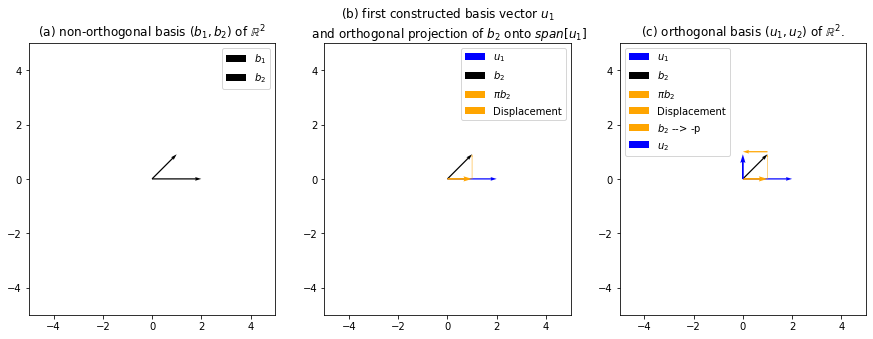

In [63]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(15,5))
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].set_title(r"(a) non-orthogonal basis $(b_1,b_2)$ of $\mathbb{R}^2$")
a[1].set_title(r"(b) first constructed basis vector $u_1$"+"\n"+r" and orthogonal projection of $b_2$ onto $span[u_1]$")
a[2].set_title(r"(c) orthogonal basis $(u_1, u_2)$ of $\mathbb{R}^2$.")
# Figure setup.


a[0].quiver(*origin2D, *b1,scale=scale, width = .005)
a[0].quiver(*origin2D, *b2,scale=scale, width = .005)
a[0].legend([r"$b_1$",r"$b_2$"])

a[1].quiver(*origin2D, *u1,scale=scale, width = .005, color = "b")
a[1].quiver(*origin2D, *b2,scale=scale, width = .005)
a[1].quiver(*origin2D, *p,scale=scale, width = .007, color = "orange")
a[1].quiver(*p, *b2-p, scale = scale, width= .002, color = "orange")
a[1].legend([r"$u_1$",r"$b_2$",r"$\pi b_2$","Displacement"])

a[2].quiver(*origin2D, *u1, scale = scale, width = .005, color = "b")
a[2].quiver(*origin2D, *b2, scale = scale, width = .005)
a[2].quiver(*origin2D, *p, scale = scale, width = .007, color = "orange")
a[2].quiver(*p, *b2-p, scale = scale, width= .002, color = "orange")
a[2].quiver(*b2,*-p, scale = scale, width= .005, color = "orange")
a[2].quiver(*origin2D, *b2-p, scale = scale, width= .007, color = "b")
a[2].legend([r"$u_1$",r"$b_2$",r"$\pi b_2$","Displacement",r"$b_2$ --> -p",r"$u_2$"]);

From here we can see that the new bases, $u_1, u_2$, are orthogonal, although not orthonormal as $u_1$ is not unitary.

In [64]:
angle(cosAngle(u1,u2))
Matrix(u1)

90.0

Matrix([
[2],
[0]])

### 3.8.4 Projection onto Affine Subspaces
*Recall affine subspaces from Chapter 2. In $\mathbb{R}^2$, a line is defined by a support point $x_0$ and a vector $x_1$, with the equation $L = x_0 + \lambda x_1$. We can intuit if the value of $\lambda$ is 0 or 1, we have a point either at $x_0$ or $\lambda x_1$, our support point however, will always "hold" our line at a certain point.* 

In [65]:
plt.rcParams[ "figure.figsize" ] = (10,10)

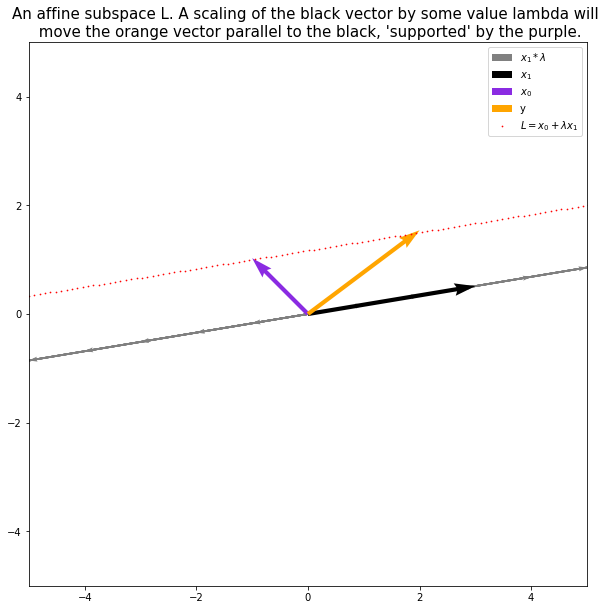

In [66]:
# Figure setup.
scale = 10
origin = np.array([0,0])
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("An affine subspace L. A scaling of the black vector by some value lambda will \n move the orange vector parallel to the black, 'supported' by the purple.", size=15)
# Figure setup.

# Data setup.
lam = 1
x0 = np.array([-1,1])
x1 = np.array([3,.5])
val = x0+lam*x1
x1s = np.vstack([l*x1 for l in np.linspace(-4,4,25)]) # Grey lines
# Data setup.

# Plotting vectors.
plt.quiver(*origin, x1s[:,0],x1s[:,1], width=.003, scale=scale, color="grey")
plt.quiver(*origin, *x1, scale=scale, color="k")
plt.quiver(*origin, *x0, scale=scale, color="blueviolet")
plt.quiver(*origin, *val, scale=scale, color="orange") #L = x_0 + lambda * x_1 ; Affine subspace
# Plotting vectors.

# Plotting subspace.
# Arbitrary choice of 250 points on the subspace. Subspace is any infinite amount of points along the line.
val = np.vstack([x0+l*x1 for l in np.linspace(-4,4,250)]) 
plt.scatter(val[:,0],val[:,1],color="r", s = .5)
# Plotting subspace.

plt.legend(["$x_1*\lambda$",r"$x_1$",r"$x_0$","y",r"$L = x_0 + \lambda x_1$"]);

#### Figure 3.13
We replicate the above, this time in $\mathbb{R}^3$ and with projection onto a plane.

In [67]:
# Data setup.
basis1 = np.vstack([1,0,0])
basis2 = np.vstack([0,1,0])
B = np.hstack([basis1,basis2])
support = np.vstack([-2,-1,3])
x = np.vstack([1,-3,4.5])
P = B@npl.inv(B.T@B)@B.T # Projection matrix onto basis.
proj = P@(x-support) # Projection of x onto basis.
displ = x - support - proj
# Data setup.

Matrix(B)
Matrix(P)
Matrix(x-support)
Matrix(proj)
Matrix(displ)

Matrix([
[1, 0],
[0, 1],
[0, 0]])

Matrix([
[1.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 0.0]])

Matrix([
[ 3.0],
[-2.0],
[ 1.5]])

Matrix([
[ 3.0],
[-2.0],
[ 0.0]])

Matrix([
[0.0],
[0.0],
[1.5]])

In [68]:
plt.rcParams[ "figure.figsize" ] = (12,12)

In [69]:
def fig313(a = True, b = True, c = True):# 3D Figure Formatting.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    scale3D = 5
    ax.set_xlim3d(-scale3D/1,scale3D/1)
    ax.set_ylim3d(scale3D/1,-scale3D/1) 
    ax.set_zlim3d(-scale3D/1,scale3D/1)
    ax.grid(b=None)
    ax.set_title(r"Figure 3.13. Affine Projection in $\mathbb{R}^3$.", size = 20)
    # 3D Figure Formatting.
    if (a):
        # Basis span visualization.
        spanScalar = 6
        ax.quiver(*origin3D,*B[:,0]*spanScalar, color='lightblue', linewidths = .5,arrow_length_ratio = .05)
        quiveropts = dict(color='lightblue', linewidths = .5,arrow_length_ratio = .05, label='_nolegend_')
        ax.quiver(*origin3D,*B[:,1]*spanScalar,**quiveropts)
        ax.quiver(*origin3D,*-B[:,0]*spanScalar,**quiveropts)
        ax.quiver(*origin3D,*-B[:,1]*spanScalar,**quiveropts)
        ax.quiver(*B[:,0]*spanScalar, *((B[:,0]+B[:,1])-B[:,0])*spanScalar,**quiveropts)
        ax.quiver(*B[:,0]*spanScalar, *((B[:,0]+B[:,1])-B[:,0])*-spanScalar,**quiveropts)
        ax.quiver(*-B[:,0]*spanScalar, *(-((B[:,0]+B[:,1])-B[:,0]))*spanScalar,**quiveropts)
        ax.quiver(*-B[:,0]*spanScalar, *(-((B[:,0]+B[:,1])-B[:,0]))*-spanScalar,**quiveropts)
        # Basis span visualization.

        # L span visualization.
        ax.quiver(*origin3D,*support,color='purple', linewidths = 1.5,arrow_length_ratio = .05)
        ax.quiver(*support, *B[:,0]*spanScalar, color='grey', linewidths = .75,arrow_length_ratio = .05)
        quiveropts = dict(color='grey', linewidths = .75,arrow_length_ratio = .05, label='_nolegend_')
        ax.quiver(*support, *B[:,1]*spanScalar,**quiveropts)
        ax.quiver(*support, *-B[:,0]*spanScalar,**quiveropts)
        ax.quiver(*support, *-B[:,1]*spanScalar,**quiveropts)
        ax.quiver(*support+np.vstack(B[:,0]*spanScalar), *-B[:,1]*spanScalar, **quiveropts)
        ax.quiver(*support+np.vstack(B[:,0]*spanScalar), *B[:,1]*spanScalar, **quiveropts)
        ax.quiver(*support+np.vstack(-B[:,0]*spanScalar),*-B[:,1]*spanScalar, **quiveropts)
        ax.quiver(*support+np.vstack(-B[:,0]*spanScalar),*B[:,1]*spanScalar, **quiveropts)
        # L span visualization.s

    ax.quiver(*origin3D, *x, color='orange', linewidths = 1.5,arrow_length_ratio = .05) # Initial vector.
        
    if (b):
    # Projections.
        ax.quiver(*origin3D, *x-support, color='red', linewidths = 1.5,arrow_length_ratio = .05)
        ax.quiver(*origin3D, *proj, color='pink', linewidths = .75,arrow_length_ratio = .05)
        ax.quiver(*proj, *displ, color='pink', linewidths = .75,arrow_length_ratio = .05, label='_nolegend_')
    ## "Add support point back in"
    if (c):
        ax.quiver(*proj, *support, color='purple', linewidths = .75,arrow_length_ratio = .05,label='_nolegend_')
        ax.quiver(*origin3D+support, *proj, color='pink', linewidths = .75,arrow_length_ratio = .05, label='_nolegend_')
        ax.quiver(*x, *-displ, color='pink', linewidths = .75,arrow_length_ratio = .05, label='_nolegend_')
        ax.quiver(*support, *x-support, color='pink', linewidths = .75,arrow_length_ratio = .05, label='_nolegend_')
    # Projections.

    ax.legend(["Basis","'Support'","Linear Manifold, L","x","x-Support","projection"]);

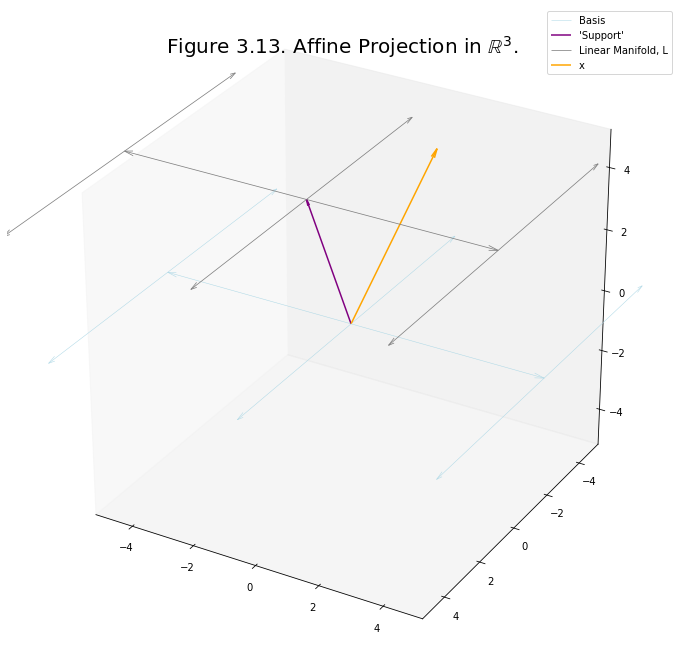

In [70]:
fig313(b=False,c=False)

$(a)$ Original setting: we're given a basis, a support, an affine subspace created by the support, and a vector x. 

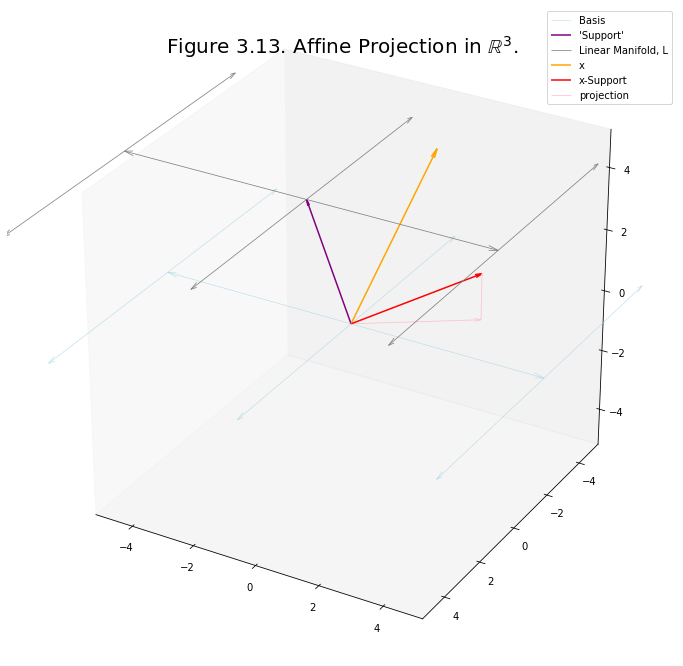

In [71]:
fig313(c=False)

$(b)$ Reduce problem to projection $\pi_U$ onto basis. Original setting shifted by `-support` so that `x-support` can be projected onto the direction space $U$, our basis.

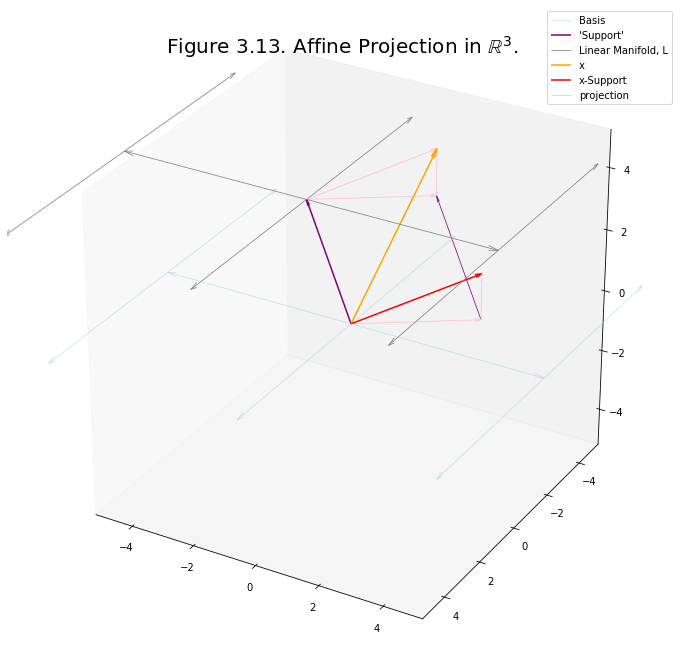

In [72]:
fig313()

$(c)$ Add support point back in to get affine projection $\pi_L$. Projection is translated back to `support`$+\pi_U$ `(x-support)`, which gives the final orthogonal projection $\pi_L(x)$.

### 3.9 Rotations
#### Figure 3.14 

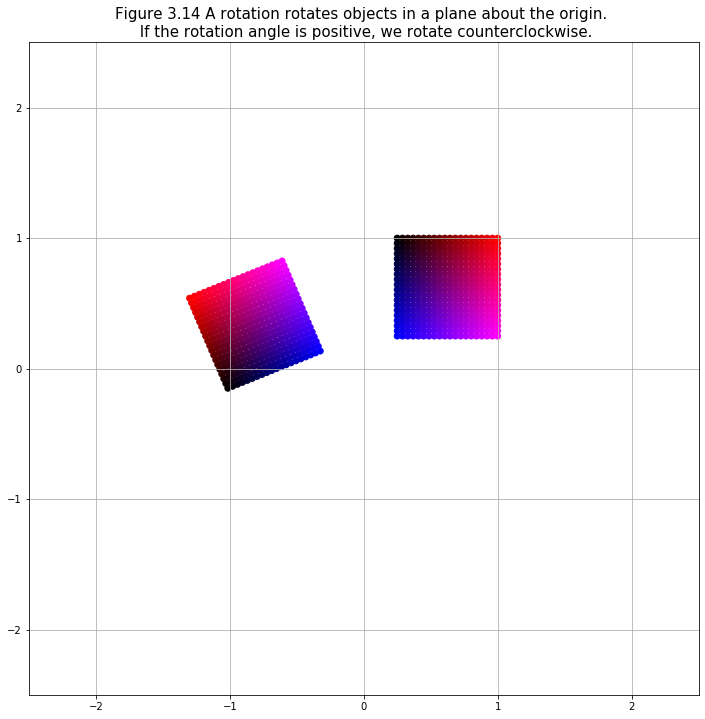

In [73]:
plt.grid(b=True)
plt.axis([-2.5,2.5,-2.5,2.5])
colors = np.vstack([[i,0,j] for i in np.linspace(0,1,20) for j in np.linspace(1,0,20)])
plt.title("Figure 3.14 A rotation rotates objects in a plane about the origin. \n If the rotation angle is positive, we rotate counterclockwise.", size = 15)

R = np.vstack([[-.38,-.92],[.92,-.38]]) # Rotation matrix.
original = np.vstack([[i,j] for i in np.linspace(.25,1,20) for j in np.linspace(.25,1,20)]) # Original coordinates.
rotated = np.dot(original,R.T) # Rotated coordinates. # Rotation step.

plt.scatter(original[:,0],original[:,1], c = colors)
plt.scatter(rotated[:,0],rotated[:,1], c = colors);

In [74]:
Matrix(R)

Matrix([
[-0.38, -0.92],
[ 0.92, -0.38]])

#### Figure 3.15 
*Book shows robot arm as a demonstration of an application of rotations.*

#### Figure 3.16 
*Rotation of the standard basis in $\mathbb{R}^2$ by an angle $\theta$.*

In [75]:
e1 = np.vstack([1,0])
e2 = np.vstack([0,1])
someVec = np.vstack([3,1])
Matrix(e1)
Matrix(e2)
Matrix(someVec)

Matrix([
[1],
[0]])

Matrix([
[0],
[1]])

Matrix([
[3],
[1]])

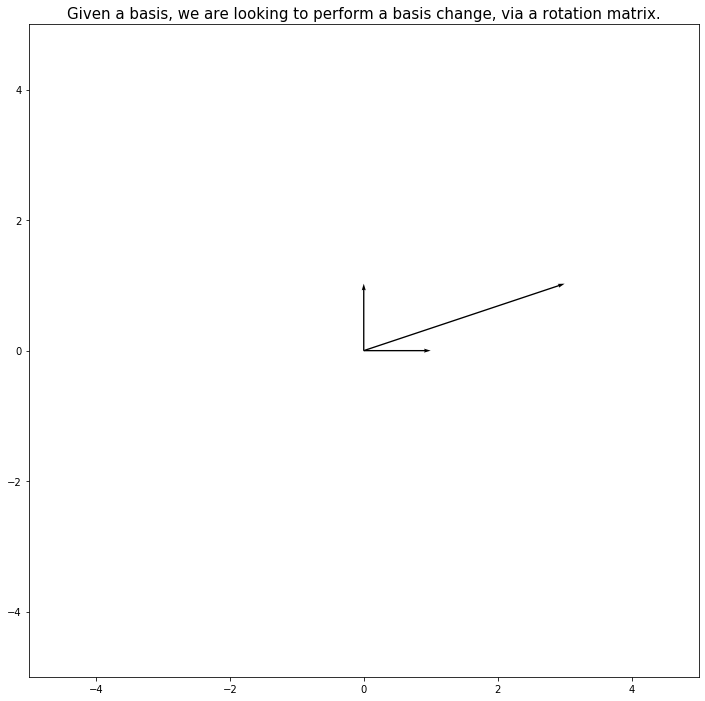

In [76]:
plt.quiver(*origin2D, *e1, scale = scale, width = .002)
plt.quiver(*origin2D, *e2, scale = scale, width = .002)
plt.quiver(*origin2D, *someVec, scale = scale, width = .002)
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("Given a basis, we are looking to perform a basis change, via a rotation matrix.", size = 15);

Trigonometric identities for sine and cosine work conveniently for rotations.

In [77]:
E = np.hstack([e1,e2])
phiE1 = lambda theta: np.vstack([np.cos(theta),np.sin(theta)])
phiE2 = lambda theta: np.vstack([-np.sin(theta),np.cos(theta)])
Phi = lambda theta: np.hstack([phiE1(theta), phiE2(theta)]) # Constructed transformation matrix.

In [78]:
R = Phi(np.pi/4)
Matrix(R)

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [79]:
Matrix(E@Phi(np.pi/4))

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [80]:
Matrix(someVec)
Matrix(np.dot(someVec.flatten(),R))

Matrix([
[3],
[1]])

Matrix([
[ 2.82842712474619],
[-1.41421356237309]])

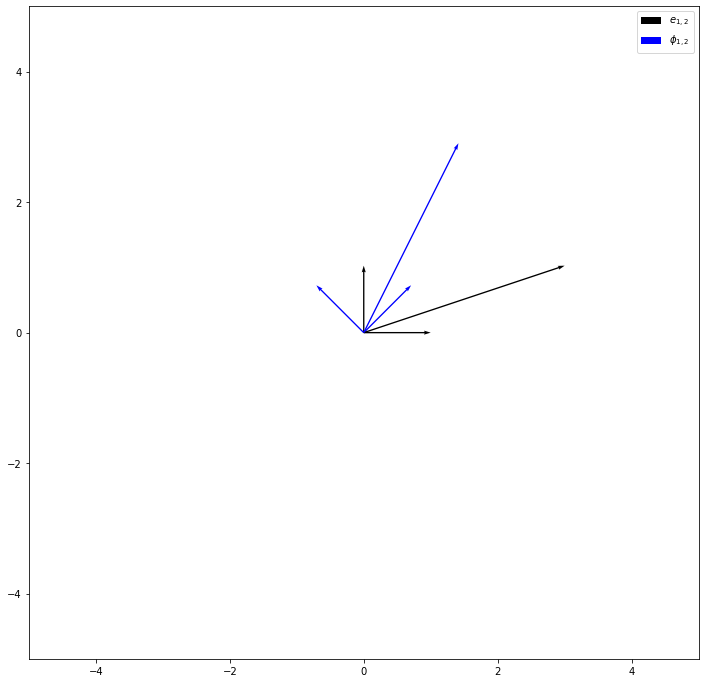

In [81]:
plt.quiver(*origin2D, *e1, scale = scale, width = .002)
plt.quiver(*origin2D, *e2, scale = scale, width = .002, label = '_nolegend_')
plt.quiver(*origin2D, *E@R[:,0], scale = scale, width = .002, color = "b")
plt.quiver(*origin2D, *E@R[:,1], scale = scale, width = .002, color = "b", label = '_nolegend_')
plt.quiver(*origin2D, *someVec, scale = scale, width = .002)
plt.quiver(*origin2D, *np.dot(someVec.flatten(),R.T), scale = scale, width = .002, color = "b")
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.legend([r"$e_{1,2}$",r"$\phi_{1,2}$"]);

Rotations in $\mathbb{R}^3$ can be thought of as rotations of the images of the standard bases of $\mathbb{R}^3$, so long as the images are orthonormal to each other, and can be implemented with a general rotation matrix by combining the images of the standard basis. 

The above transformations can be surmised as the following rotation matrix. 
$$
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{bmatrix}
$$

In $\mathbb{R}^3$, rotation about the x,y,z axes is of the following respective formats. 
$$
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & \cos \theta & -\sin \theta \\
0 & \sin \theta & \cos \theta
\end{bmatrix}, 
\begin{bmatrix}
\cos \theta & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta
\end{bmatrix}, 
\begin{bmatrix}
\cos \theta & -\sin \theta & 0  \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1 
\end{bmatrix}
$$

In [82]:
zRot = lambda theta: np.vstack([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta),np.cos(theta), 0], [0, 0, 1]])
R = zRot(np.pi/4)
Matrix(R)

Matrix([
[0.707106781186548, -0.707106781186547, 0.0],
[0.707106781186547,  0.707106781186548, 0.0],
[              0.0,                0.0, 1.0]])

In [83]:
B3 = np.eye(3)
Matrix(B3)

Matrix([
[1.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 1.0]])

In [84]:
rotatedB = np.dot(B3,R.T)
Matrix(rotatedB)

Matrix([
[ 0.707106781186548, 0.707106781186547, 0.0],
[-0.707106781186547, 0.707106781186548, 0.0],
[               0.0,               0.0, 1.0]])

In [85]:
someVec = np.vstack([-2,1,3])
Matrix(someVec)

Matrix([
[-2],
[ 1],
[ 3]])

In [86]:
rotatedVec = np.dot(someVec.T,R).T
Matrix(rotatedVec)

Matrix([
[-0.707106781186548],
[  2.12132034355964],
[               3.0]])

In [87]:
P = B@npl.inv(B.T@B)@B.T # Projection matrix onto basis.
proj = P@(someVec) # Projection of x onto basis.
displ = someVec - proj

In [88]:
newPlane = np.hstack([np.vstack(rotatedB[:,0]),np.vstack(rotatedB[:,1])]) # Span of rotated basis to project onto.
P1 = newPlane@npl.inv(newPlane.T@newPlane)@newPlane.T # Projection matrix onto basis.
proj1 = P1@(rotatedVec) # Projection of x onto basis.
displ1 = rotatedVec - proj1

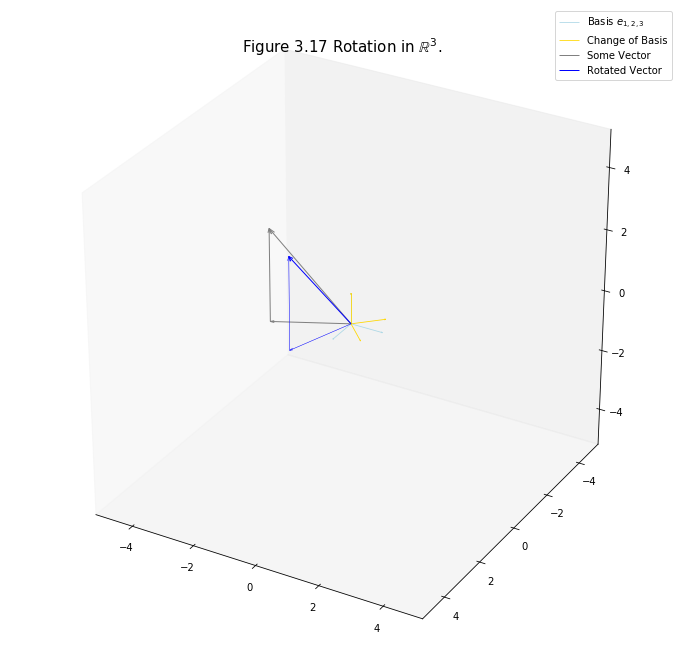

In [89]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
scale3D = 5
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
ax.grid(b=None)
ax.set_title(r"Figure 3.17 Rotation in $\mathbb{R}^3$.", size = 15);
# Figure setup.

# Bases.
quiveropts = dict(color='lightblue', linewidths = .8, arrow_length_ratio = .05, label = '_nolegend_') 
ax.quiver(*origin3D, *B3[:,0], color='lightblue', linewidths = .8, arrow_length_ratio = .05)
ax.quiver(*origin3D, *B3[:,1], **quiveropts)
ax.quiver(*origin3D, *B3[:,2], **quiveropts)
# Bases.

# Rotations.
quiveropts = dict(color='gold', linewidths = .8, arrow_length_ratio = .05, label = '_nolegend_')
ax.quiver(*origin3D, *rotatedB[:,0], color='gold', linewidths = .8, arrow_length_ratio = .05) # Change of basis.
ax.quiver(*origin3D, *rotatedB[:,1], **quiveropts)
ax.quiver(*origin3D, *rotatedB[:,2], **quiveropts)
ax.quiver(*origin3D, *someVec, color='grey', linewidths = 1, arrow_length_ratio = .05) # Some vector.
ax.quiver(*origin3D, *rotatedVec, color = 'b', linewidths = 1, arrow_length_ratio = .05) # Rotated vector.
# Rotations.

# Projections.
quiveropts = dict(color='grey', linewidths = 1, arrow_length_ratio = .05, label = '_nolegend_') 
ax.quiver(*origin3D, *proj, **quiveropts)
ax.quiver(*proj, *displ, **quiveropts)
ax.quiver(*origin3D, *proj1, color='blue', linewidths = .5, arrow_length_ratio = .05)
ax.quiver(*proj1, *displ1, color='blue', linewidths = .5, arrow_length_ratio = .05)
# Projections.

plt.legend([r"Basis $e_{1,2,3}$","Change of Basis","Some Vector","Rotated Vector"]);